In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Option d'affichage : montrer toutes les colonnes
pd.set_option('display.max_columns', None)

In [3]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
print(train.shape)
print(test.shape)
print(train.duplicated().sum())
print(train.isna().sum())
train.info()





(58592, 44)
(39063, 43)
0
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius          

In [4]:
train.head(15)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [5]:
train['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

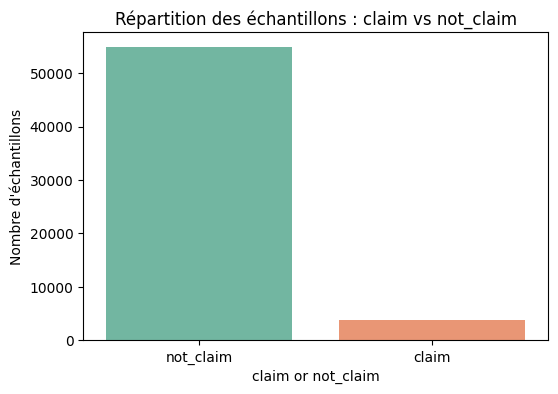

In [6]:
# Créer le graphique
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='is_claim', hue='is_claim', palette='Set2', legend=False)
plt.title("Répartition des échantillons : claim vs not_claim")
plt.xlabel("claim or not_claim")
plt.xticks([0, 1], ['not_claim', 'claim'])
plt.ylabel("Nombre d'échantillons")

# Sauvegarde
plt.savefig("visuals/repartition_classes.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
columns_boolean = [col for col in train.columns if 'is_' in col and col != 'is_claim']
print(columns_boolean)
for col in columns_boolean:
    train[col] = train[col].apply(lambda x: 1 if x == 'Yes' else 0)
    test[col] = test[col].apply(lambda x: 1 if x == 'Yes' else 0)


['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [8]:
train_data=train.select_dtypes(['int64','float64'])
test_data=test.select_dtypes(['int64','float64'])
print(train_data['is_claim'].value_counts())
print(train_data.shape)
print(test_data.shape)
print(train_data.columns)

# Colonnes numériques sauf "is_claim"
cols_to_check = train_data.columns.drop("is_claim")

# Calcul de l'IQR sur les colonnes choisies
Q1 = train_data[cols_to_check].quantile(0.25)
Q3 = train_data[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Filtrage des lignes sans outliers
train_data = train_data[~((train_data[cols_to_check] < (Q1 - 1.5 * IQR)) | 
                   (train_data[cols_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

X=train_data.drop(columns=['is_claim'])
y=train_data['is_claim']

print(train_data.shape)





is_claim
0    54844
1     3748
Name: count, dtype: int64
(58592, 33)
(39063, 32)
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')
(37542, 33)


In [9]:
train_data.to_csv("data/train_data.csv", index=False)
y.to_csv("data/y.csv", index=False)
X.to_csv("data/X.csv", index=False)
test_data.head()


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,4076,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.307241,0.13,0.442308,8794,1,2,0,1,0,1,0,1197,4,5,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2
2,0.327924,0.12,0.451923,8794,2,2,0,0,0,0,1,999,3,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2
3,0.782654,0.01,0.461538,34738,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1.233404,0.02,0.634615,34738,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0


In [10]:
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
policy_tenure,37542.0,0.593502,0.408605,0.002739,0.200590,0.553493,1.021509,1.386520
age_of_car,37542.0,0.061584,0.052767,0.000000,0.020000,0.050000,0.100000,0.240000
age_of_policyholder,37542.0,0.469464,0.121868,0.288462,0.365385,0.451923,0.548077,0.817308
population_density,37542.0,15478.248388,11579.636502,290.000000,6108.000000,8794.000000,27003.000000,35036.000000
make,37542.0,1.330723,1.046401,1.000000,1.000000,1.000000,1.000000,5.000000
airbags,37542.0,2.295136,1.045690,2.000000,2.000000,2.000000,2.000000,6.000000
is_esc,37542.0,0.100741,0.300989,0.000000,0.000000,0.000000,0.000000,1.000000
is_adjustable_steering,37542.0,0.537318,0.498612,0.000000,0.000000,1.000000,1.000000,1.000000
is_tpms,37542.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
is_parking_sensors,37542.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train_data["is_claim"].value_counts()

is_claim
0    35068
1     2474
Name: count, dtype: int64

<Axes: ylabel='is_claim'>

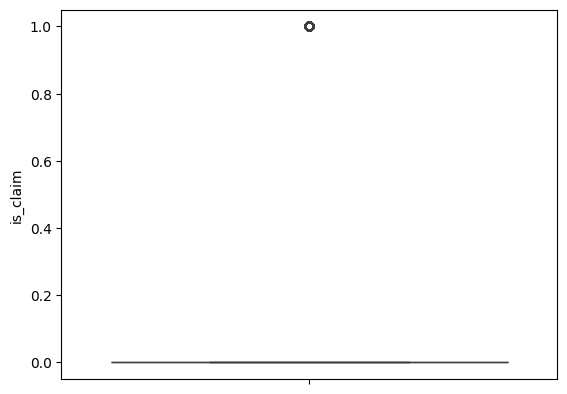

In [12]:
sns.boxplot(data=train_data, y="is_claim")



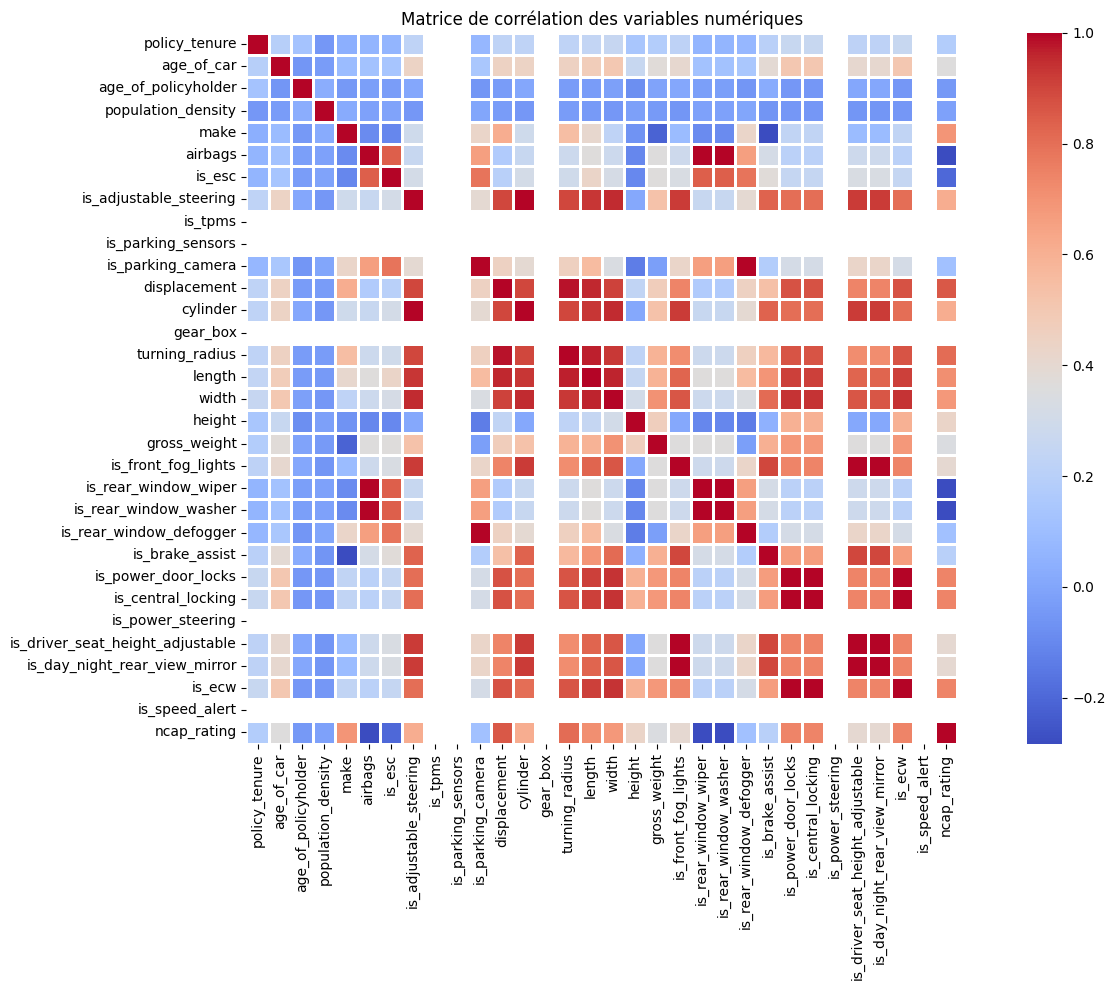

,length,width,turning_radius,cylinder,is_adjustable_steering,is_central_locking,is_power_door_locks,is_ecw,displacement,is_front_fog_lights,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_brake_assist,ncap_rating,gross_weight,is_rear_window_defogger,is_parking_camera,is_esc,is_rear_window_wiper,is_rear_window_washer
length,1.000000,0.963160,0.967795,0.931202,0.931202,0.912750,0.912750,0.912750,0.957040,0.826747,0.826747,0.826747,0.691864,0.711182,0.593064,0.554372,0.554372,0.433325,0.363669,0.363669
width,0.963160,1.000000,0.926778,0.950912,0.950912,0.938551,0.938551,0.938551,0.909249,0.862197,0.862197,0.862197,0.813911,0.681404,0.702260,0.343257,0.343257,0.322919,0.279690,0.279690
turning_radius,0.967795,0.926778,1.000000,0.898846,0.898846,0.869084,0.869084,0.869084,0.984652,0.715340,0.715340,0.715340,0.567552,0.807588,0.589327,0.455053,0.455053,0.294117,0.280627,0.280627
cylinder,0.931202,0.950912,0.898846,1.000000,1.000000,0.804259,0.804259,0.804259,0.894953,0.923858,0.923858,0.923858,0.830508,0.613442,0.528072,0.395571,0.395571,0.310588,0.261909,0.261909
is_adjustable_steering,0.931202,0.950912,0.898846,1.000000,1.000000,0.804259,0.804259,0.804259,0.894953,0.923858,0.923858,0.923858,0.830508,0.613442,0.528072,0.395571,0.395571,0.310588,0.261909,0.261909
is_central_locking,0.912750,0.938551,0.869084,0.804259,0.804259,1.000000,1.000000,1.000000,0.870594,0.743021,0.743021,0.743021,0.667943,0.739872,0.680805,0.318142,0.318142,0.249793,0.210643,0.210643
is_power_door_locks,0.912750,0.938551,0.869084,0.804259,0.804259,1.000000,1.000000,1.000000,0.870594,0.743021,0.743021,0.743021,0.667943,0.739872,0.680805,0.318142,0.318142,0.249793,0.210643,0.210643
is_ecw,0.912750,0.938551,0.869084,0.804259,0.804259,1.000000,1.000000,1.000000,0.870594,0.743021,0.743021,0.743021,0.667943,0.739872,0.680805,0.318142,0.318142,0.249793,0.210643,0.210643
displacement,0.957040,0.909249,0.984652,0.894953,0.894953,0.870594,0.870594,0.870594,1.000000,0.740256,0.740256,0.740256,0.538873,0.858221,0.473514,0.451841,0.451841,0.201524,0.169939,0.169939
is_front_fog_lights,0.826747,0.862197,0.715340,0.923858,0.923858,0.743021,0.743021,0.743021,0.740256,1.000000,1.000000,1.000000,0.898956,0.402308,0.363377,0.428173,0.428173,0.336186,0.283495,0.283495


In [16]:
# Afficher la matrice de corrélation complète
corr_matrix = X.corr()
subset=corr_matrix.abs().mean().sort_values(ascending=False).head(20).index
corr_subset = corr_matrix.loc[subset, subset]
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True,linewidths=1)
plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.savefig("visuals/matrice_corr.png", dpi=300, bbox_inches='tight')
plt.show()
corr_subset.head(20)

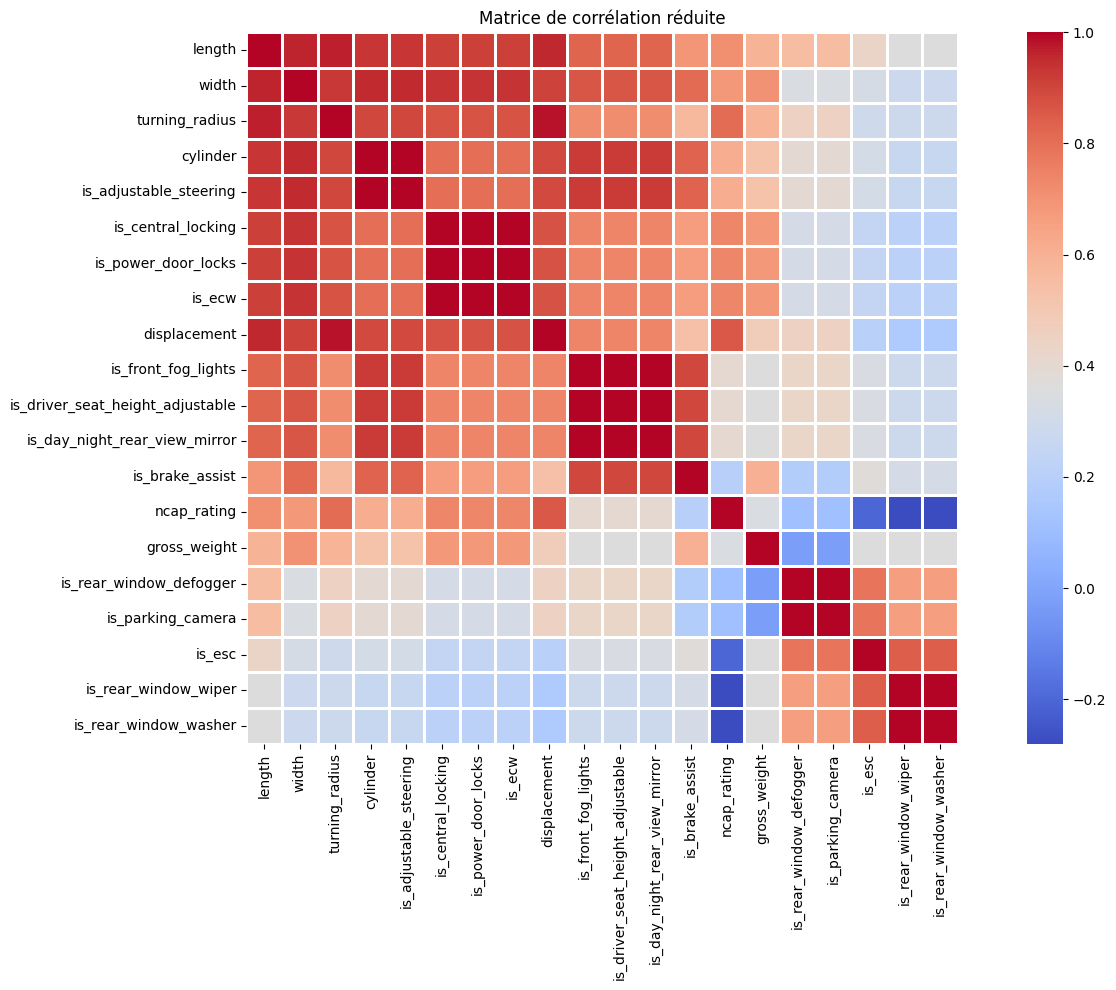

In [14]:
# Afficher la matrice de corrélation réduite

plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_subset, annot=False, fmt=".2f", cmap='coolwarm', square=True,linewidths=1)
plt.title("Matrice de corrélation réduite")
plt.tight_layout()
plt.savefig("visuals/matrice_corr_reduite.png", dpi=300, bbox_inches='tight')
plt.show()

is_claim,0,1
policy_tenure,0.585385,0.708555
age_of_car,0.061935,0.056613
age_of_policyholder,0.468905,0.477384
population_density,15495.490305,15233.850849
make,1.329731,1.344786
airbags,2.294285,2.307195
is_esc,0.100177,0.108731
is_adjustable_steering,0.535018,0.569927
is_tpms,0.000000,0.000000
is_parking_sensors,1.000000,1.000000


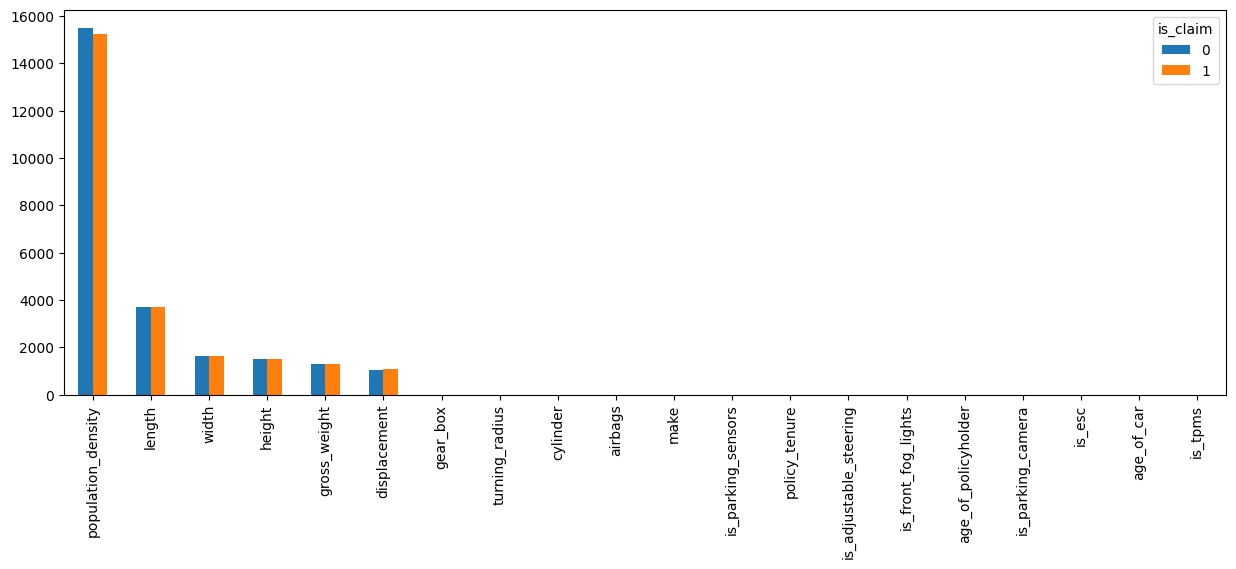

In [15]:
train_data.groupby("is_claim").mean().T.head(20).sort_values(by=0, ascending=False).plot(kind='bar', figsize=(15, 5))
train_data.groupby("is_claim").mean().T.head(20)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.189985,-0.219542,1.434084,-0.905761,-0.316062,-0.282244,-0.334703,-1.077642,0.0,0.0,-0.426284,-1.166526,-1.077642,0.0,-1.164503,-1.223012,-1.257583,-0.799204,-0.912223,-0.995588,-0.282244,-0.282244,-0.426284,-0.894990,-1.339919,-1.339919,0.0,-0.995588,-0.995588,-1.339919,0.0,-0.991369
1,0.193630,-0.788089,-0.775139,0.995273,-0.316062,-0.282244,-0.334703,-1.077642,0.0,0.0,-0.426284,-1.166526,-1.077642,0.0,-1.164503,-1.223012,-1.257583,-0.799204,-0.912223,-0.995588,-0.282244,-0.282244,-0.426284,-0.894990,-1.339919,-1.339919,0.0,-0.995588,-0.995588,-1.339919,0.0,-0.991369
2,0.605993,-0.788089,-0.696239,-0.984694,-0.316062,-0.282244,-0.334703,-1.077642,0.0,0.0,-0.426284,-1.166526,-1.077642,0.0,-1.164503,-1.223012,-1.257583,-0.799204,-0.912223,-0.995588,-0.282244,-0.282244,-0.426284,-0.894990,-1.339919,-1.339919,0.0,-0.995588,-0.995588,-1.339919,0.0,-0.991369
3,0.750796,0.917553,-0.301734,0.530572,-0.316062,-0.282244,2.987724,0.927952,0.0,0.0,2.345854,0.602099,0.927952,0.0,0.562516,1.311531,0.893189,-0.105898,0.551800,1.004432,-0.282244,-0.282244,2.345854,1.117331,0.746314,0.746314,0.0,1.004432,1.004432,0.746314,0.0,0.464790
4,-1.212702,1.865132,-0.538437,-0.808866,2.550945,-0.282244,-0.334703,0.927952,0.0,0.0,-0.426284,1.925260,0.927952,0.0,2.289535,1.288490,1.088714,0.032763,2.064624,-0.995588,-0.282244,-0.282244,-0.426284,-0.894990,0.746314,0.746314,0.0,-0.995588,-0.995588,0.746314,0.0,2.649029


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 8  9 13 26 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


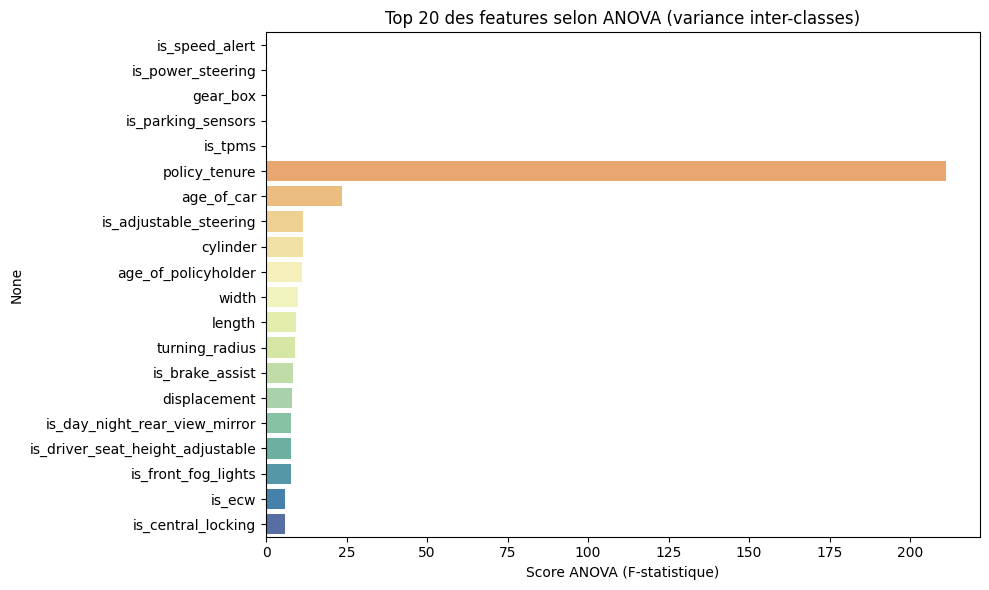

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Sélection des 20 meilleures features
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X_scaled, y)

# Récupérer les scores et noms
scores = selector.scores_
top_indices = np.argsort(scores)[-20:][::-1]
top_features = X.columns[top_indices]
top_scores = scores[top_indices]

# Graphe
plt.figure(figsize=(10,6))
sns.barplot(x=top_scores, y=top_features, hue=top_features, palette='Spectral', legend=False)
plt.title("Top 20 des features selon ANOVA (variance inter-classes)")
plt.xlabel("Score ANOVA (F-statistique)")
plt.tight_layout()
plt.savefig("visuals/top20_anova_features.png", dpi=300)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Séparer les données en ensembles d'entraînement et de test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())
summary_metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
summary_metrics["Model"] = ["XGBoost", "Random Forest", "Logistic Regression", "SVC", "KNN","MLP"]






is_claim
0    28054
1     1979
Name: count, dtype: int64
is_claim
0    7014
1     495
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7014
           1       0.15      0.00      0.01       495

    accuracy                           0.93      7509
   macro avg       0.54      0.50      0.49      7509
weighted avg       0.88      0.93      0.90      7509

0.9328805433479824


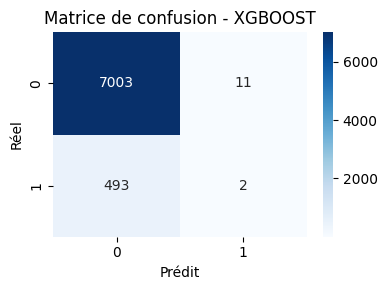

In [19]:
# ⚙️ Entraînement du modèle XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 🔍 Prédictions
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - XGBOOST")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_xgboost.png", dpi=300)
plt.show()
#  bilan des performances
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = classification_report(y_test, y_pred_xgb, output_dict=True)["1"]["precision"]
recall = classification_report(y_test, y_pred_xgb, output_dict=True)["1"]["recall"]
f1_score = classification_report(y_test, y_pred_xgb, output_dict=True)["1"]["f1-score"]
summary_metrics.loc[summary_metrics["Model"] == "XGBoost", ["Accuracy", "Precision", "Recall", "F1-Score"]] = [accuracy, precision, recall, f1_score]


In [20]:
# Prédiction sur le jeu de test
y_pred_test_xgb= xgb_model.predict(test_data)
y_pred_test_xgb = pd.DataFrame(y_pred_test_xgb, columns=['is_claim'])
print(y_pred_test_xgb.value_counts())
test_pred_xgb = test.copy()
test_pred_xgb["is_claim"] = y_pred_test_xgb
test_pred_xgb.to_csv("data/test_pred_xgb.csv", index=False)
test_pred_xgb[test_pred_xgb['is_claim'] == 1].head(15)



is_claim
0           38917
1             146
Name: count, dtype: int64


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
497,ID59090,1.247018,0.17,0.423077,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
971,ID59564,1.203030,0.04,0.576923,C5,34738,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1251,ID59844,1.039536,0.02,0.663462,C17,65567,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
1403,ID59996,1.195781,0.12,0.500000,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
1696,ID60289,0.956187,0.00,0.317308,C15,290,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
2031,ID60624,0.529408,0.00,0.471154,C10,73430,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2231,ID60824,1.101721,0.00,0.471154,C10,73430,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2440,ID61033,0.021538,0.00,0.346154,C10,73430,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2677,ID61270,0.023958,0.04,0.442308,C10,73430,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2890,ID61483,1.099984,0.03,0.663462,C10,73430,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1


In [ ]:
# Test de GridSearchCV avec XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Définir le modèle
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',  # Métrique d'évaluation
    cv=5,                # Validation croisée (5 folds)
    verbose=1,
    n_jobs=-1            # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

# Utiliser le meilleur modèle
best_model = grid_search.best_estimator_

# Évaluer le modèle sur l'ensemble de test
y_pred_GS = best_model.predict(X_test)
print(classification_report(y_test, y_pred_GS))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Meilleur score : 0.9341058198224838
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7014
           1       0.00      0.00      0.00       495

    accuracy                           0.93      7509
   macro avg       0.47      0.50      0.48      7509
weighted avg       0.87      0.93      0.90      7509



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7014
           1       0.04      0.00      0.01       495

    accuracy                           0.93      7509
   macro avg       0.49      0.50      0.49      7509
weighted avg       0.88      0.93      0.90      7509

0.9286189905446797


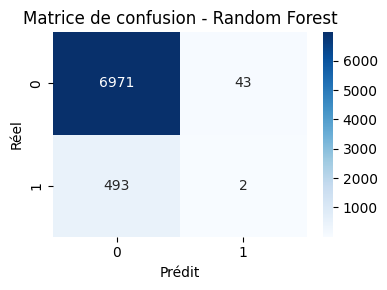

In [21]:
# ⚙️ Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# 🔍 Prédiction
y_pred_rf = rf_model.predict(X_test)
# Sauvegarde des résultats
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_rf.png", dpi=300)
plt.show()
# Bilan des performances
accuracy = accuracy_score(y_test, y_pred_rf)
precision = classification_report(y_test, y_pred_rf, output_dict=True)["1"]["precision"]
recall = classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"]
f1_score = classification_report(y_test, y_pred_rf, output_dict=True)["1"]["f1-score"]
summary_metrics.loc[summary_metrics["Model"] == "Random Forest", ["Accuracy", "Precision", "Recall", "F1-Score"]] = [accuracy, precision, recall, f1_score]


In [22]:
# Prédiction sur le jeu de test
y_pred_test_rf= rf_model.predict(test_data)
y_pred_test_rf = pd.DataFrame(y_pred_test_rf, columns=['is_claim'])
print(y_pred_test_rf.value_counts())
test_pred_rf = test.copy()
test_pred_rf["is_claim"] = y_pred_test_rf
test_pred_rf.to_csv("data/test_pred_rf.csv", index=False)
test_pred_rf[test_pred_rf['is_claim'] == 1].head(15)



is_claim
0           38917
1             146
Name: count, dtype: int64


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
52,ID58645,0.715068,0.14,0.298077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1
135,ID58728,0.910273,0.15,0.509615,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1
334,ID58927,0.923118,0.00,0.384615,C3,4076,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1
382,ID58975,0.832505,0.00,0.403846,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
429,ID59022,0.855384,0.00,0.538462,C6,13051,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
545,ID59138,1.247778,0.01,0.855769,C10,73430,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
917,ID59510,0.943222,0.04,0.538462,C2,27003,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1
939,ID59532,0.265485,0.00,0.442308,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1150,ID59743,1.101960,0.03,0.644231,C8,8794,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1375,ID59968,1.083517,0.12,0.528846,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7014
           1       0.00      0.00      0.00       495

    accuracy                           0.93      7509
   macro avg       0.47      0.50      0.48      7509
weighted avg       0.87      0.93      0.90      7509

0.9340791050739113


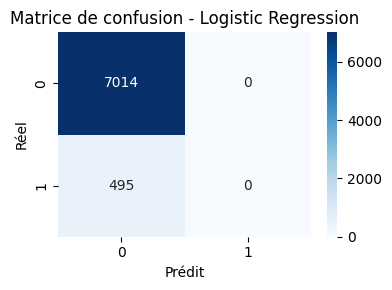

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [23]:
# ⚙️ Entraînement du modèle  Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
# 🔍 Prédiction
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_log))
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Logistic Regression")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_log.png", dpi=300)
plt.show()
# Bilan des performances
accuracy = accuracy_score(y_test, y_pred_log)
precision = classification_report(y_test, y_pred_log, output_dict=True)["1"]["precision"]
recall = classification_report(y_test, y_pred_log, output_dict=True)["1"]["recall"]
f1_score = classification_report(y_test, y_pred_log, output_dict=True)["1"]["f1-score"]
summary_metrics.loc[summary_metrics["Model"] == "Logistic Regression", ["Accuracy", "Precision", "Recall", "F1-Score"]] = [accuracy, precision, recall, f1_score]


In [24]:
# Prédiction sur le jeu de test
y_pred_test_log= log_model.predict(test_data)
y_pred_test_log = pd.DataFrame(y_pred_test_log, columns=['is_claim'])
print(y_pred_test_log.value_counts())
test_pred_log = test.copy()
test_pred_log["is_claim"] = y_pred_test_log
test_pred_log.to_csv("data/test_pred_log.csv", index=False)
test_pred_rf[test_pred_log['is_claim'] == 1].head(15)



is_claim
0           39063
Name: count, dtype: int64


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7014
           1       0.00      0.00      0.00       495

    accuracy                           0.93      7509
   macro avg       0.47      0.50      0.48      7509
weighted avg       0.87      0.93      0.90      7509

0.9340791050739113


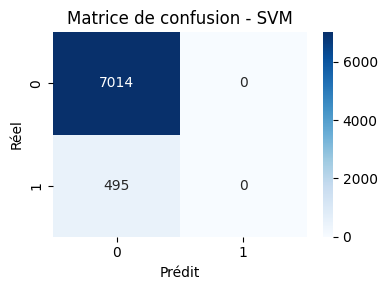

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [25]:
# ⚙️ Entraînement du modèle  SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
# 🔍 Prédiction
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_svm.png", dpi=300)
plt.show()
# Bilan des performances
accuracy = accuracy_score(y_test, y_pred_svm)
precision = classification_report(y_test, y_pred_svm, output_dict=True)["1"]["precision"]
recall = classification_report(y_test, y_pred_svm, output_dict=True)["1"]["recall"]
f1_score = classification_report(y_test, y_pred_svm, output_dict=True)["1"]["f1-score"]
summary_metrics.loc[summary_metrics["Model"] == "SVC", ["Accuracy", "Precision", "Recall", "F1-Score"]] = [accuracy, precision, recall, f1_score]

In [26]:
# Prédiction sur le jeu de test
y_pred_test_svm= svm_model.predict(test_data)
y_pred_test_svm = pd.DataFrame(y_pred_test_svm, columns=['is_claim'])
print(y_pred_test_svm.value_counts())
test_pred_svm = test.copy()
test_pred_svm["is_claim"] = y_pred_test_svm
test_pred_svm.to_csv("data/test_pred_svm.csv", index=False)
test_pred_svm[test_pred_svm['is_claim'] == 1].head(15)



is_claim
0           39063
Name: count, dtype: int64


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7014
           1       0.08      0.00      0.01       495

    accuracy                           0.93      7509
   macro avg       0.51      0.50      0.49      7509
weighted avg       0.88      0.93      0.90      7509

0.9314156345718471


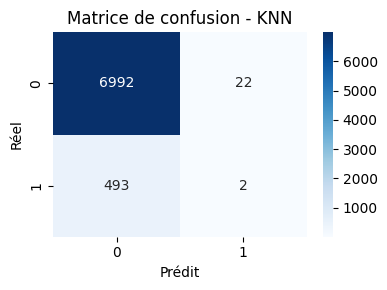

In [27]:
# ⚙️ Entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
# 🔍 Prédiction
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - KNN")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_knn.png", dpi=300)
plt.show()
# Bilan des performances
accuracy = accuracy_score(y_test, y_pred_knn)
precision = classification_report(y_test, y_pred_knn, output_dict=True)["1"]["precision"]
recall = classification_report(y_test, y_pred_knn, output_dict=True)["1"]["recall"]
f1_score = classification_report(y_test, y_pred_knn, output_dict=True)["1"]["f1-score"]
summary_metrics.loc[summary_metrics["Model"] == "KNN", ["Accuracy", "Precision", "Recall", "F1-Score"]] = [accuracy, precision, recall, f1_score]

In [28]:
# Prédiction sur le jeu de test
y_pred_test_knn= knn_model.predict(test_data)
y_pred_test_knn = pd.DataFrame(y_pred_test_knn, columns=['is_claim'])
print(y_pred_test_knn.value_counts())
test_pred_knn = test.copy()
test_pred_knn["is_claim"] = y_pred_test_knn
test_pred_knn.to_csv("data/test_pred_knn.csv", index=False)
test_pred_knn[test_pred_knn['is_claim'] == 1].head(15)



is_claim
0           38718
1             345
Name: count, dtype: int64


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
89,ID58682,0.933288,0.10,0.769231,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
334,ID58927,0.923118,0.00,0.384615,C3,4076,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1
368,ID58961,1.152027,0.13,0.769231,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
457,ID59050,0.433427,0.15,0.519231,C10,73430,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,1
839,ID59432,1.058222,0.11,0.394231,C5,34738,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,1
882,ID59475,0.180849,0.16,0.384615,C10,73430,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,0,0,0,1,0,Drum,998,3,Manual,5,Power,4.7,3655,1620,1675,1340,0,0,0,0,0,1,1,1,0,0,1,1,2,1
919,ID59512,1.055705,0.14,0.413462,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,1
1059,ID59652,0.139738,0.14,0.355769,C10,73430,1,Utility,M10,CNG,85Nm@3000rpm,61.68bhp@6000rpm,G12B,1,0,0,0,1,0,Drum,1196,4,Manual,5,Manual,4.5,3675,1475,1825,1510,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1089,ID59682,0.089201,0.02,0.528846,C10,73430,1,Utility,M10,CNG,85Nm@3000rpm,61.68bhp@6000rpm,G12B,1,0,0,0,1,0,Drum,1196,4,Manual,5,Manual,4.5,3675,1475,1825,1510,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1291,ID59884,0.203968,0.05,0.528846,C10,73430,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,0,0,0,1,0,Drum,998,3,Manual,5,Power,4.7,3655,1620,1675,1340,0,0,0,0,0,1,1,1,0,0,1,1,2,1


In [29]:
# MLP model
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# Architecture du MLP
mlp = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilation
mlp.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Entraînement
history = mlp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8655 - loss: 70.0165 - val_accuracy: 0.9371 - val_loss: 0.3502
Epoch 2/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9282 - loss: 0.9149 - val_accuracy: 0.9371 - val_loss: 0.2691
Epoch 3/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9312 - loss: 0.4058 - val_accuracy: 0.9371 - val_loss: 0.2719
Epoch 4/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9291 - loss: 0.3504 - val_accuracy: 0.9371 - val_loss: 0.2576
Epoch 5/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9356 - loss: 0.2675 - val_accuracy: 0.9371 - val_loss: 0.2446
Epoch 6/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9301 - loss: 0.2721 - val_accuracy: 0.9371 - val_loss: 0.2373
Epoch 7/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9321 - loss: 0.2540 - val_accuracy: 0.9371 - val_loss: 0.2357
Epoch 8/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9307 - loss: 0.2959 - val_accuracy: 

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📊 Rapport de classification - MLP (full_scaled)
              precision    recall  f1-score   support

           0     0.9341    1.0000    0.9659      7014
           1     0.0000    0.0000    0.0000       495

    accuracy                         0.9341      7509
   macro avg     0.4670    0.5000    0.4830      7509
weighted avg     0.8725    0.9341    0.9022      7509

0.9340791050739113


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

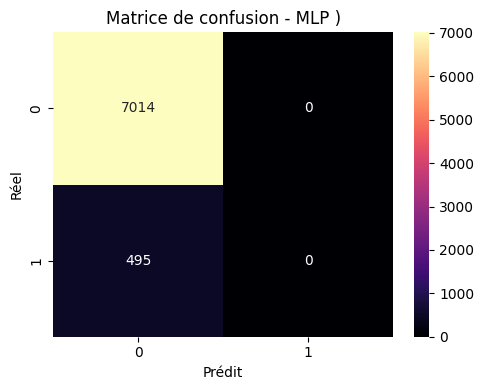

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [30]:
# Prédictions
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp_labels = (y_pred_mlp > 0.5).astype(int)

# Rapport de classification
print("📊 Rapport de classification - MLP (full_scaled)")
print(classification_report(y_test, y_pred_mlp_labels, digits=4))
print(accuracy_score(y_test, y_pred_mlp_labels))
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_mlp_labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title("Matrice de confusion - MLP )")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_mlp.png", dpi=300)
plt.show()
# Bilan des performances 
accuracy = accuracy_score(y_test, y_pred_mlp_labels)
precision = classification_report(y_test, y_pred_mlp_labels, output_dict=True)["1"]["precision"]
recall = classification_report(y_test, y_pred_mlp_labels, output_dict=True)["1"]["recall"]
f1_score = classification_report(y_test, y_pred_mlp_labels, output_dict=True)["1"]["f1-score"]
summary_metrics.loc[summary_metrics["Model"] == "MLP", ["Accuracy", "Precision", "Recall", "F1-Score"]] = [accuracy, precision, recall, f1_score]


In [31]:
print(test_pred_xgb[test_pred_xgb['is_claim'] == 1].index)
print(test_pred_rf[test_pred_rf['is_claim'] == 1].index)
print(test_pred_log[test_pred_log['is_claim'] == 1].index)
print(test_pred_svm[test_pred_svm['is_claim'] == 1].index)
print(test_pred_knn[test_pred_knn['is_claim'] == 1].index)

eval= {
    'xgb': test_pred_xgb[test_pred_xgb['is_claim'] == 1].index,
    'rf': test_pred_rf[test_pred_rf['is_claim'] == 1].index,
    'log': test_pred_log[test_pred_log['is_claim'] == 1].index,
    'svm': test_pred_svm[test_pred_svm['is_claim'] == 1].index,
    'knn': test_pred_knn[test_pred_knn['is_claim'] == 1].index
}
eval_df = pd.DataFrame.from_dict(eval, orient='index').T

eval_df.to_csv("data/eval.csv", index=False)



Index([  497,   971,  1251,  1403,  1696,  2031,  2231,  2440,  2677,  2890,
       ...
       36099, 36168, 36234, 36690, 36959, 37299, 37810, 38077, 38157, 38694],
      dtype='int64', length=146)
Index([   52,   135,   334,   382,   429,   545,   917,   939,  1150,  1375,
       ...
       36234, 36819, 36863, 36876, 36886, 37516, 37898, 38128, 38384, 39037],
      dtype='int64', length=146)
Index([], dtype='int64')
Index([], dtype='int64')
Index([   89,   334,   368,   457,   839,   882,   919,  1059,  1089,  1291,
       ...
       37812, 37945, 38034, 38238, 38430, 38720, 38861, 38906, 38986, 39052],
      dtype='int64', length=345)


In [32]:

# xgb
columns_drop=[col for col in train.columns if col not in ['is_claim'] ]
test_pred_xgb_copy=test_pred_xgb.copy()
test_pred_xgb_copy.drop(columns=columns_drop, inplace=True)
test_pred_xgb_copy.rename(columns={'is_claim': 'is_claim_xgb'}, inplace=True)
test_pred_xgb_copy
#rf
test_pred_rf_copy=test_pred_rf.copy()
test_pred_rf_copy.drop(columns=columns_drop, inplace=True)
test_pred_rf_copy.rename(columns={'is_claim': 'is_claim_rf'}, inplace=True)
test_pred_rf_copy
#log
test_pred_log_copy=test_pred_log.copy()
test_pred_log_copy.drop(columns=columns_drop, inplace=True)
test_pred_log_copy.rename(columns={'is_claim': 'is_claim_log'}, inplace=True)
test_pred_log_copy
#svm
test_pred_svm_copy=test_pred_svm.copy()
test_pred_svm_copy.drop(columns=columns_drop, inplace=True)
test_pred_svm_copy.rename(columns={'is_claim': 'is_claim_svm'}, inplace=True)
test_pred_svm_copy
#knn
test_pred_knn_copy=test_pred_knn.copy()
test_pred_knn_copy.drop(columns=columns_drop, inplace=True)
test_pred_knn_copy.rename(columns={'is_claim': 'is_claim_knn'}, inplace=True)
test_pred_knn_copy
#concat
test_pred_final=pd.concat([test_pred_xgb_copy, test_pred_rf_copy, test_pred_log_copy, test_pred_svm_copy, test_pred_knn_copy], axis=1)
test_pred_final.to_csv("data/test_pred_final.csv", index=False)
test_final_prediction=pd.concat([test, test_pred_final], axis=1)
test_final_prediction.to_csv("data/test_final_prediction.csv", index=False)
test_final_prediction.head(15)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim_xgb,is_claim_rf,is_claim_log,is_claim_svm,is_claim_knn
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0,0,0,0,0
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,0
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,ID58598,0.148635,0.15,0.442308,C8,8794,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
6,ID58599,1.114182,0.09,0.355769,C16,16206,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,0,0,0,1,0,Drum,998,3,Manual,5,Power,4.70,3655,1620,1675,1340,0,0,0,0,0,1,1,1,0,0,1,1,2,0,0,0,0,0
7,ID58600,1.113638,0.01,0.471154,C14,7788,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0,0,0,0,0
8,ID58601,0.360385,0.15,0.519231,C11,6108,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,0,0,0,1,0,Drum,998,3,Manual,5,Power,4.70,3655,1620,1675,1340,0,0,0,0,0,1,1,1,0,0,1,1,2,0,0,0,0,0
9,ID58602,1.209922,0.06,0.451923,C11,6108,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


In [33]:
test_final_prediction[(test_final_prediction['is_claim_xgb'] == 1) & (test_final_prediction['is_claim_rf'] == 1) 
& (test_final_prediction['is_claim_log'] == 1)& (test_final_prediction['is_claim_svm'] == 1) 
& (test_final_prediction['is_claim_knn'] == 1) ]

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim_xgb,is_claim_rf,is_claim_log,is_claim_svm,is_claim_knn


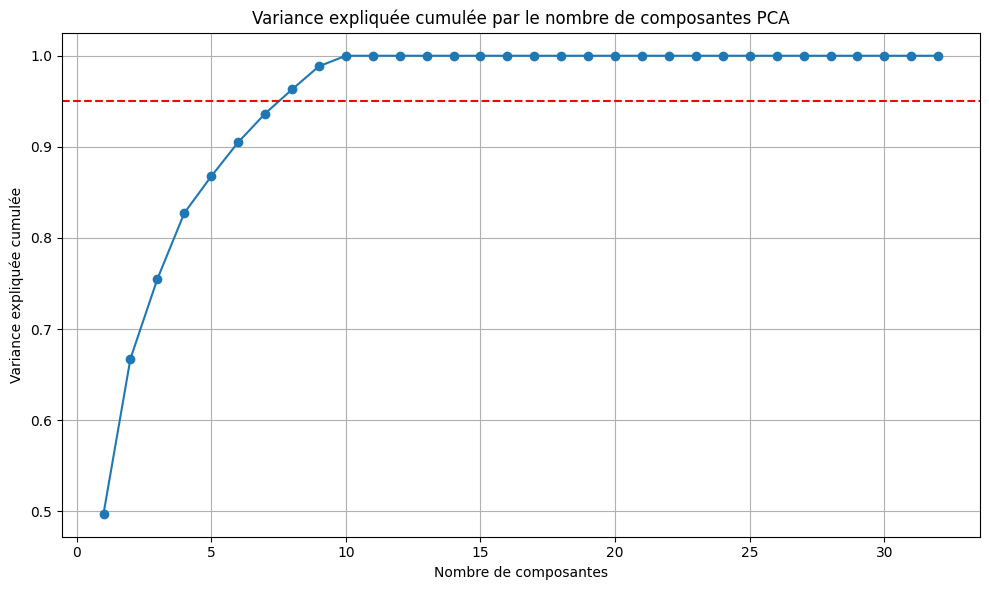

(37542, 15)
(37542, 32)


In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Appliquer PCA sans réduction immédiate pour tout voir
pca = PCA()
X_pca_debut = pca.fit_transform(X_scaled)


# Variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Variance expliquée cumulée par le nombre de composantes PCA")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.grid(True)
plt.tight_layout()
plt.savefig("visuals/pca_variance_cumulee.png", dpi=300)
plt.show()
# Appliquer PCA avec réduction immédiate
pca_final = PCA(n_components=15, random_state=42)
X_pca = pca_final.fit_transform(X_scaled)
print(X_pca.shape)
print(X.shape)


(30033, 15)
(7509, 15)
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7014
           1       0.23      0.01      0.01       495

    accuracy                           0.93      7509
   macro avg       0.58      0.50      0.49      7509
weighted avg       0.89      0.93      0.90      7509

0.9331468903981889


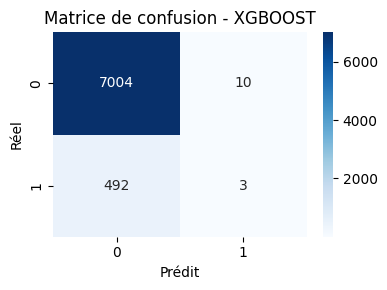

In [35]:
# Séparer les données en ensembles d'entraînement et de test
X_pca_train,X_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
print(X_pca_train.shape)
print(X_pca_test.shape)
# ⚙️ Entraînement du modèle Random Forest pca
xgb_model_pca = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model_pca.fit(X_pca_train, y_pca_train)
# 🔍 Prédiction
y_pred_xgb_pca = xgb_model_pca.predict(X_pca_test)
# Sauvegarde des résultats
print(classification_report(y_pca_test, y_pred_xgb_pca))
print(accuracy_score(y_pca_test, y_pred_xgb_pca))
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_pca_test, y_pred_xgb_pca), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - XGBOOST")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.savefig("visuals/confusion_xgb_pca.png", dpi=300)
plt.show()


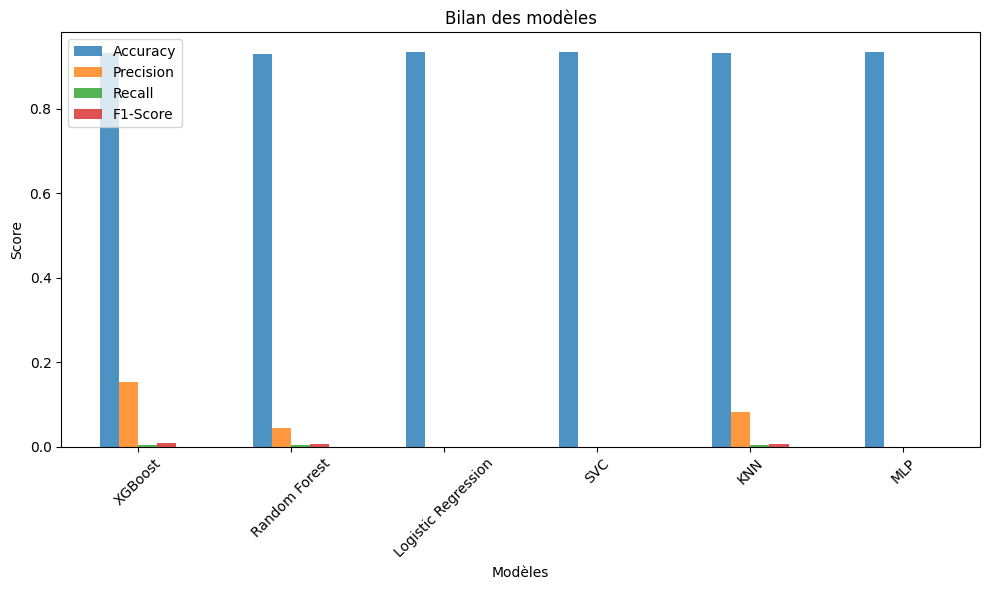

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.932881,0.153846,0.00404,0.007874
1,Random Forest,0.928619,0.044444,0.00404,0.007407
2,Logistic Regression,0.934079,0.0,0.0,0.0
3,SVC,0.934079,0.0,0.0,0.0
4,KNN,0.931416,0.083333,0.00404,0.007707


In [36]:
# Afichage du bilan des models
plt.figure(figsize=(10,6))
summary_metrics.set_index("Model").plot(kind='bar', alpha=0.8, ax=plt.gca())
plt.title("Bilan des modèles")
plt.ylabel("Score")
plt.xlabel("Modèles")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/bilan_modeles.png", dpi=300)
plt.show()
summary_metrics.to_csv("data/summary_metrics.csv", index=False)
summary_metrics.head()








In [39]:
import pickle
import os

# Créer le dossier models s'il n'existe pas
os.makedirs("models", exist_ok=True)

# Après l'entraînement de chaque modèle, ajoutez:

# Pour XGBoost
with open("models/xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Pour Random Forest
with open("models/rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Pour Logistic Regression
with open("models/log_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

# Pour SVM
with open("models/svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Pour KNN
with open("models/knn_model.pkl", "wb") as f:
    pickle.dump(knn_model, f)

# Pour MLP (si applicable)
with open("models/mlp_model.pkl", "wb") as f:
    pickle.dump(mlp, f)